<a href="https://colab.research.google.com/github/AraujoFernando/Portifolio/blob/master/A%20Viol%C3%AAnca%20na%20Cidade%20de%20Salvador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://www.transportal.com.br/noticias/wp-content/uploads/2018/12/Largo-do-Pelourinho-Salvador-720x250.jpg">

*by Fernando Araújo*

#**A Violênca na Cidade de Salvador**

A Cidade do Salvador foi fundada em 1549 pelo primeiro governador do Brasil, Thomé de Sousa. Foi planejada e construída para ser a capital da América é Lusitana, dando início à colonização efetiva do Brasil. A cidade é conhecida como a ‘‘cidade mais negra do Brasil’’ por concentrar a maior comunidade de negros e negras fora do continente africano.

O aumento da violência urbana está diretamente ligado ao tráfico de drogas. O surgimento de facções criminosas, que travam uma guerra pelo controle do tráfico na cidade, vem causando um aumento significativo no numéro de crimes contra a vida.

Vamos analisar os dados disponibilizados pelo Especial [Mil Vidas](https://www.correio24horas.com.br/mil-vidas/) do Jornal [Correio](https://www.correio24horas.com.br/capa/) tentar criar um mapa da criminalidade.

## Obtenção dos Dados


Os dados foram obtidos atráves do **Especial Mil Vidas** no link [www.correio24horas.com.br/mil-vidas](https://www.correio24horas.com.br/mil-vidas/).
Aos que tiverem interesse o dataset utilizado nessa análise encontra-se [aqui](https://redacao.correio24horas.com.br/fileadmin/user_upload/correio24horas/Arquivos/Nucleo_de_dados/homicidios_201101_202005.csv?_ga=2.37662304.1580010888.1592844393-336877515.1549070596)

O conjuto de dados, contempla todos os homicidos divulgados pela Secretaria de Segurança Pública desde de 19 janeiro de 2011.

### Importando os dados


In [458]:
# importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import os
from os import path
# importação dos dados
df = pd.read_csv('https://raw.githubusercontent.com/AraujoFernando/Datasets/master/homicidios_201101_202005%20-%20Preparado.csv', sep=';')

## Análise Inicial dos Dados

De inicio exploraremos o nosso dataset, afim de conhecer com o que estamos  lidando. Vamos verificar suas dimensões.

In [293]:
# verificar o tamanho do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')

Entradas: 11925
Variáveis: 7


Uma vez que conhecemos as dimenssões do nosso DataFrame, vamos verificar os dados que estão disponíveis, conhecendo as variáveis existentes no DataFrame.

In [294]:
# imprimir nome das colunas
df.columns

Index(['DATA', 'NOME', 'SEXO', 'IDADE', 'CIDADE', 'ENDEREÇO', 'BAIRRO'], dtype='object')

Agora, sabendo quantas variáveis e entradas estamos lidando, além do tipo de informação que entraremos no DataFrame, é importante conhecermos os tipos de variáveis que temos.

In [295]:
# verifcar os tipos de variáveis
df.dtypes

DATA        object
NOME        object
SEXO        object
IDADE       object
CIDADE      object
ENDEREÇO    object
BAIRRO      object
dtype: object

É importante perceber que todas as varáveis são do tipo *object*, mas a frente vamos converter algumas colunas para obtermos melhores resultados em nossa análise.

Finalmente, vamos ter um vislumbre do nosso DataFrame, dando uma olhada nas 5 primeiras entradas.

In [296]:
# verificar as 5 primeiras entradas
df.head(5)

,DATA,NOME,SEXO,IDADE,CIDADE,ENDEREÇO,BAIRRO
0,1/19/2011,Identidade Ignorada,M,NI,Salvador,Rua Do Tubo,Saramandaia
1,1/19/2011,Identidade Ignorada,M,40,Salvador,Pelourinho,Pelourinho
2,1/20/2011,Claúdio Silva Dos Santos,M,41,Salvador,Alameda Antonio Carlos Magalhães,Pau da Lima
3,1/20/2011,Jossivaldo Pereira Dos Santos,M,30,Salvador,Rua Almeida Brandão,Paripe
4,1/20/2011,Jeferter Lordelo De Souza,M,37,Salvador,Rua Adelino Santos / Restaurante Quero Mais,Pero Vaz


Nesse primeiro momento é possível perceber a existência de valores não informados (**NI**) pelo menos duas colunas. Podemos sugerir algumas hipóteses do que poderia explicar essa ausência, e como podemos contorná-la para continuar explorando o conjunto de dados.

*   Como se trata de crimes de Homicidios, muitas das vezes não é possível fazer a indetificação dos corpos, devido ao estado em que foram encontrados.
*   Infelizmente, se tratando de Brasil, se hoje temos uma cultura de dados que ainda deixa a desejar, o que dizer da mesma no período em tela? Devemos levar em consideração também o formato em que esses dados eram registrados à época. Será que foram registrados corretamente? Ou será que o gerenciamento dessas informações sempre foi falho?

Antes de decidirmos o que fazer em relação aos dados **NI**, vamos verificar a proporção deles em relação à totalidade do dataset.

In [297]:
# verificar o percentual  valores NI nas vaiáves IDADE, Endereço e Bairro.
 
print(f"Idade: {round((len(df.loc[df.IDADE == 'NI']) / df.shape[0] * 100), 2)}%");
print(f"Endereço: {round((len(df.loc[df.ENDEREÇO == 'NI']) / df.shape[0] * 100), 2)}%");
print(f"Bairro: {round((len(df.loc[df.BAIRRO == 'NI']) / df.shape[0] * 100), 2)}%")
print(f"Data: {round((len(df.loc[df.DATA == 'NI']) / df.shape[0] * 100), 2)}%")

Idade: 34.25%
Endereço: 0.41%
Bairro: 0.0%
Data: 0.0%


Acima, podemos ver que algumas das variáveis tem valores faltantes em proporções consideráveis como é o exemplo de `IDADE` e  `BAIRRO` com **30,42%** e **11,31%** respectivamente.

###Tratamento dos dados
Antes de tratarmos os valores **NI**, vamos convertar algumas variáveis, para melhor desenvolvermos nossa análise.

In [298]:
# convertendo a coluna DATA para datetime
df.DATA = pd.to_datetime(df.DATA, format='%m/%d/%Y')

# convertendo NI em valor nulo NAN na variável idade
df.IDADE = df.IDADE.replace(['NI', 'Ni'], np.nan)

# convertendo a coluna IDADE para numerica
df.IDADE = pd.to_numeric(df.IDADE)

# preenchendo os valores nulos com a mediana
df.IDADE = df.IDADE.fillna(25)
# limpando espaços na variável SEXO
df.SEXO = [x.strip() for x in df.SEXO]
df.SEXO.unique()


array(['M', 'F'], dtype=object)

Após uma olhada mais detelhada no DataFrame, foi possível identificar muitas anomalias nos dados. Foram realizados os seguintes tratamentos:

*   Na variável `DATA`, foram corrigidos os dados preenchidos de forma incorreta, em seguida, foi necessário a conversão para datetime.
*   Na variável `IDADE`, além de dados, não informados(**NI**), foram encontrados támbem, dados preenchidos de forma incorreta. para os dados não informados foi utilizada a mediana dos valores presentes na coluna.



Agora com os dados tratados, vamos tentar extrair algums insghts.

##**Visualizando os Dados**

In [299]:
# criando paletas de cores
pallete1 = sns.dark_palette("blood red", input="xkcd")
pallete2 = sns.cubehelix_palette(10, start=2, rot=0, dark=0, light=.95, reverse=True)
pallete3 = sns.light_palette("blood red", input="xkcd", n_colors=10, reverse=False)


###Ranking dos Bairros com o maior número de homicídios em Salvador
Aqui temos um noção dos 10 bairros com o maior número de homicídos nos anos comtemplados pelo conjuntos de dados, mas precisamente entre **2011 e 2020**.

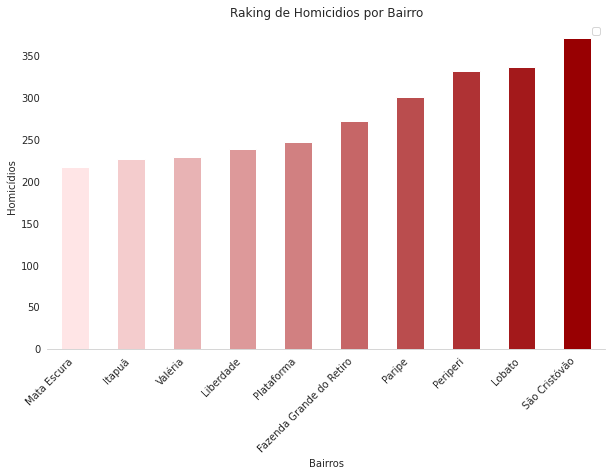

In [300]:
# criação do df_bairro para geração do gráfico
df_bairro = pd.Series(df.BAIRRO.value_counts().head(10).sort_values(ascending =True))

# Gerando gráfico de bairros mais violentos
g1 = df_bairro.plot(kind='bar', color=pallete3, figsize = (10, 6));
g1.set_xticklabels(g1.get_xticklabels(), rotation = 45, horizontalalignment = 'right');
sns.despine(left=True)
plt.xlabel('Bairros') 
plt.ylabel('Homicídios')
plt.grid()
plt.legend('')
plt.title('Raking de Homicidios por Bairro');

Dos 10 bairros com maior número de homicídos **4** estão localizados na região do Súburbio, são eles:


*   Lobato
*   Periperi
*   Paripe
*   Plataforma



*texto em itálico*###Número de Homicídos por faixa etária

Vamos agora visualizar os números por faixa etária, para começarmos a traçar um perfil de quem está mais suscetível a violência em Salvador. Usaremos as seguintes faixas:


*   0 a 10 - criança
*   11 a 18 - adolescente
*   19 a 25 - adulto jovem
*   26 a 44 - adulto
*   45 a 59 - adulto meia-idade
*   60 ou mais - idoso







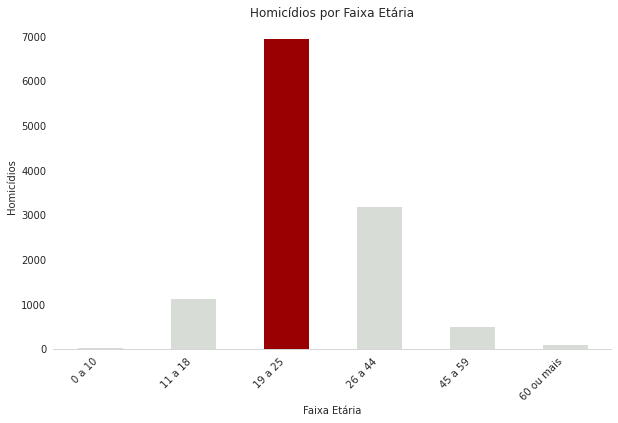

In [301]:
# criando df_faixas
faixas = {'0 a 10': df.IDADE.between(0, 10, inclusive=True).sum(), '11 a 18': df.IDADE.between(11, 18, inclusive=True).sum(),
          '19 a 25': df.IDADE.between(19, 25, inclusive=True).sum(), '26 a 44': df.IDADE.between(26, 44, inclusive=True).sum(),
          '45 a 59': df.IDADE.between(45, 59, inclusive=True).sum(), '60 ou mais': df.IDADE.between(60, 150, inclusive=True).sum()}
df_faixa = pd.Series(faixas)

# plotando o gráfico
g2 = df_faixa.plot(x=df_faixa['11 a 18'], kind='bar', color=['#d8dcd6', '#d8dcd6', '#980002', '#d8dcd6', '#d8dcd6'], figsize = (10, 6));
g2.set_xticklabels(g2.get_xticklabels(), rotation = 45, horizontalalignment = 'right');
sns.despine(left=True)
plt.xlabel('Faixa Etária') 
plt.ylabel('Homicídios')
plt.grid()
plt.title('Homicídios por Faixa Etária');

###Homicídos ao longo do Anos
Vamos analisar como se comportou os números de homicídos no decorrer do período coletado. Assim poderemos ter uma não se a cidade tem se tornado mais perigosa com o passar dos anos.
 


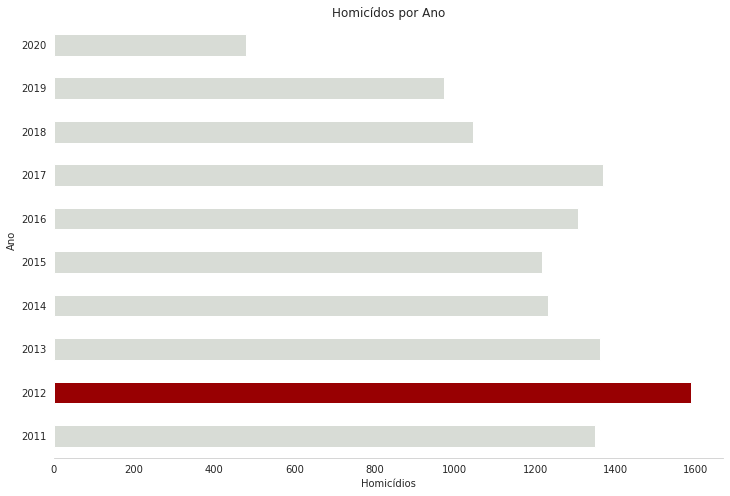

In [302]:
# grafico número de homicídios ao longo dos anos
g3 = pd.Series(df.DATA.dt.year.value_counts().sort_index())
g3.plot.barh(x=g3.values, y=g3.index, figsize=(12, 8), color=[ '#d8dcd6','#980002','#d8dcd6','#d8dcd6','#d8dcd6','#d8dcd6','#d8dcd6','#d8dcd6','#d8dcd6','#d8dcd6',])
sns.despine(left=True)
plt.xlabel('Homicídios')
plt.ylabel('Ano')
plt.title('Homicídos por Ano')
plt.grid(False)

Podemos ver no gráfico acima que **2012** foi o ano mais violento dos ultímos 10 anos no que diz respeito ao número de homicídios cometidos.

###Homicídios por Gênero
Agora, vamos analisar o percentual de homicídios por gênero.

In [395]:
# criando o df_gênero
df_genero = pd.Series(round(df.SEXO.value_counts() / df.shape[0] * 100, 1))
df_genero

M    92.5
F     7.5
Name: SEXO, dtype: float64

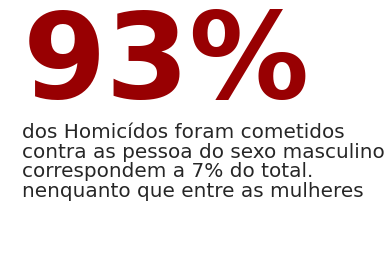

In [426]:
fig , ax = plt.subplots()
ax.plot()
ax.grid(False)
ax.annotate('93%', xy=(-0.05,0.02), ha='left', weight='bold', color='#980002', fontsize=120)
ax.annotate('dos Homicídos foram cometidos', xy=(-0.05, 0.00), ha='left', fontsize=20)
ax.annotate('contra as pessoa do sexo masculino', xy=(-0.05, -0.01), ha='left', fontsize=20)
ax.annotate('correspondem a 7% do total.', xy=(-0.05,-0.02), ha='left', fontsize=20)
ax.annotate('nenquanto que entre as mulheres', xy=(-0.05,-0.03), ha='left', fontsize=20)
sns.despine(left=True)
ax.axis('off');


###Traçando um Perfil
Atráves da análise realizada foi possível traçar um perfil parcial do cidadão que está suscetível a ser vitima de homicídio em na cidade de Salvador.

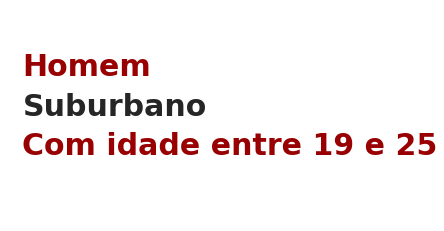

In [431]:
fig , ax = plt.subplots()
ax.plot()
ax.grid(False)
ax.annotate('Homem', xy=(-0.05,0.02), ha='left', weight='bold', color='#980002', fontsize=30)
ax.annotate('Suburbano', xy=(-0.05, 0.00), weight='bold', ha='left', fontsize=30)
ax.annotate('Com idade entre 19 e 25', xy=(-0.05, -0.02), weight='bold', color='#980002', ha='left', fontsize=30)
sns.despine(left=True)
ax.axis('off');

###Nuvem de Palavras
Por fim, vamos gerar uma nuvem de palavras, com todos os bairros registrados no dataframe. 

In [433]:
# concatenar as palavras
todos_bairros = " ".join(s for s in df.BAIRRO)

print("Quantidade de Palavras: {}".format(len(todos_bairros)))

Quantidade de Palavras: 148673


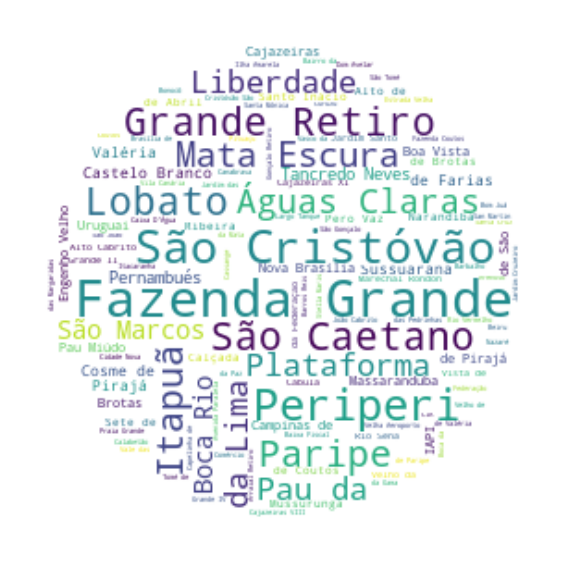

In [469]:
#mascara
x, y = np.ogrid[:300, :300]

mask = (x - 150) **2 + (y -150) **2 > 130 ** 2
mask = 255 * mask.astype(int)

# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, mask=mask,
                      background_color="white").generate(todos_bairros)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()